In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [ ]:
df = pd.read_csv("movie_metadata.csv")
df['imdb_score'] = df['imdb_score'].astype('int64')
bin_dur = [0,60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 1000]
bin_labels_dur = ['<60', '60-69', '70-79', '80-89','90-99', '100-109','110-119', '120-129','130-139','140-149', '150-159', '160-169', '170-179', '>180']
df['duration_range'] = pd.cut(df['duration'], bin_dur, right=True, labels=bin_labels_dur, include_lowest=True)
movies = df.drop_duplicates()
rec_movies = movies[movies.title_year>2004]
pd.options.display.float_format = '{:.2f}'.format

### Director Analysis

In [ ]:
dir_mean_gross=rec_movies.groupby(["director_name"])["gross", 'budget'].mean().reset_index()
dir_mean_gross.sort_values('gross', ascending = False).reset_index()

C:\Users\kdrkm\AppData\Local\Temp\ipykernel_29752\1683616595.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dir_mean_gross=rec_movies.groupby(["director_name"])["gross", 'budget'].mean().reset_index()


,index,director_name,gross,budget
0,633,James Cameron,760505847.00,237000000.00
1,926,Lee Unkrich,414984497.00,200000000.00
2,233,Chris Buck,400736600.00,150000000.00
3,539,George Lucas,380262555.00,113000000.00
4,831,Joss Whedon,369202360.33,170000000.00
...,...,...,...,...
1639,1634,Yuefeng Song,NaN,40000000.00
1640,1638,Zack Ward,NaN,NaN
1641,1639,Zackary Adler,NaN,2500000.00
1642,1641,Zoran Lisinac,NaN,250000.00


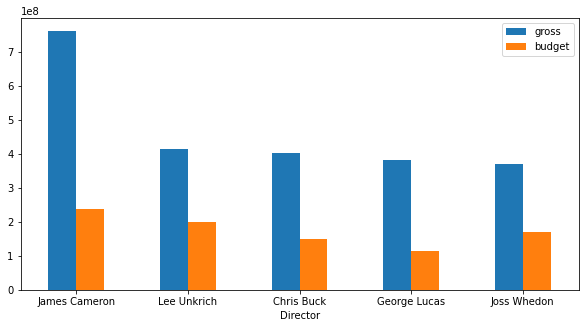

In [ ]:
dir_mean_gross.sort_values('gross', ascending = False).iloc[0:5].plot(x = 'director_name', y = ["gross", 'budget'], kind = 'bar', rot = 0, figsize = (10, 5));
plt.xlabel("Director");
plt.savefig('dir_mean_gross.jpeg')

In [ ]:
dir_mean_budget=rec_movies.groupby(["director_name"])["gross", 'budget'].mean().reset_index()
dir_mean_budget.sort_values('gross', ascending = False)

,director_name,budget
813,Joon-ho Bong,6127350000.00
909,Lajos Koltai,2500000000.00
221,Chan-wook Park,2106000000.00
103,Anurag Basu,600000000.00
782,John Woo,553632000.00
...,...,...
1579,Vera Farmiga,NaN
1590,Vipul Amrutlal Shah,NaN
1611,Whit Stillman,NaN
1632,Yorgos Lanthimos,NaN


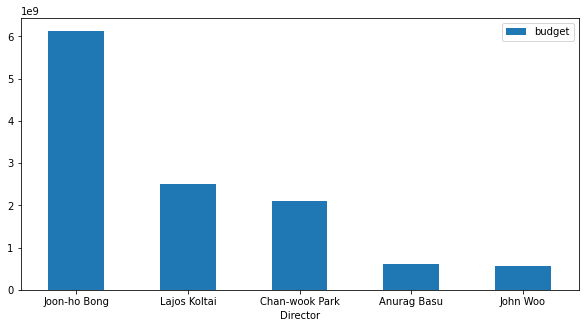

In [ ]:
dir_mean_gross.sort_values('budget', ascending = False).iloc[0:5].plot(x = 'director_name', y = 'budget', kind = 'bar', rot = 0, figsize = (10, 5));
plt.xlabel("Director");
plt.savefig('dir_mean_budget.jpeg')

In [ ]:
dir_mean_gross_bo=rec_movies.groupby(["country","director_name"])["gross"].mean().reset_index()
dir_mean_gross_bo.sort_values('gross', ascending = False).head(5)

,country,director_name,gross
1091,USA,James Cameron,760505847.00
1307,USA,Lee Unkrich,414984497.00
792,USA,Chris Buck,400736600.00
1027,USA,George Lucas,380262555.00
1243,USA,Joss Whedon,369202360.33


In [ ]:
dir_fb_likes=rec_movies.groupby(["director_name"])["director_facebook_likes"].mean().reset_index()
dir_fb_likes.sort_values('director_facebook_likes', ascending = False).iloc[0:10]

,director_name,director_facebook_likes
819,Joseph Gordon-Levitt,23000.00
265,Christopher Nolan,22000.00
359,David Fincher,21000.00
416,Derick Martini,20000.00
413,Denzel Washington,18000.00
1008,Martin Scorsese,17000.00
1242,Quentin Tarantino,16000.00
279,Clint Eastwood,16000.00
1537,Tom Hanks,15000.00
1472,Steven Spielberg,14000.00


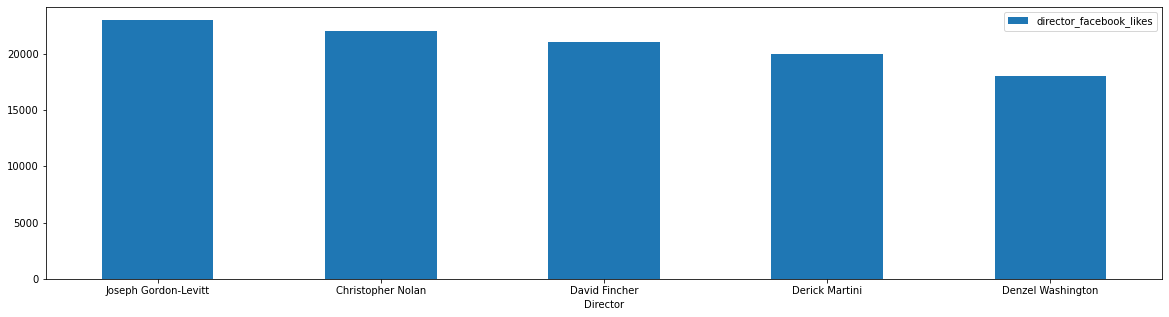

In [ ]:
dir_fb_likes.sort_values('director_facebook_likes', ascending = False).iloc[0:5].plot(x = 'director_name', y = 'director_facebook_likes', kind = 'bar', rot = 0, figsize = (20, 5));
plt.xlabel("Director");
plt.savefig('dir_fb_likes.jpeg')

In [ ]:
dir_movie_fb_likes=rec_movies.groupby(["director_name"])["movie_facebook_likes"].mean().reset_index()
dir_movie_fb_likes.sort_values('movie_facebook_likes', ascending = False).iloc[0:5]

,director_name,movie_facebook_likes
265,Christopher Nolan,131500.00
1441,Stephen Chbosky,131000.00
306,Damien Chazelle,129000.00
1242,Quentin Tarantino,118333.33
1518,Tim Miller,117000.00


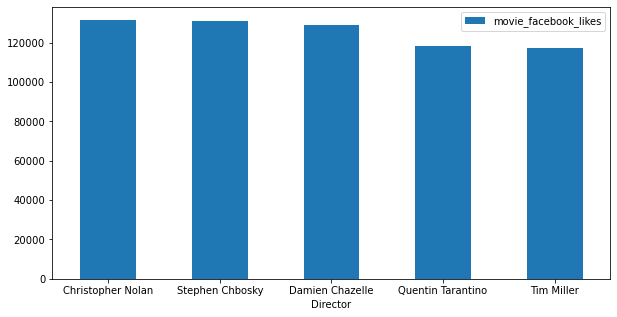

In [ ]:
dir_movie_fb_likes.sort_values('movie_facebook_likes', ascending = False).iloc[0:5].plot(x = 'director_name', y = 'movie_facebook_likes', kind = 'bar', rot = 0, figsize = (10, 5));
plt.xlabel("Director");
plt.savefig('dir_movie_fb_likes.jpeg')

In [ ]:
dir_imdb=rec_movies.groupby(["director_name"])["imdb_score"].mean().reset_index()
dir_imdb['movie_count'] = dir_imdb['director_name'].count()
dir_imdb.sort_values('imdb_score', ascending = False).iloc[0:10]

,director_name,imdb_score,movie_count
265,Christopher Nolan,8.17,1644
989,Marius A. Markevicius,8.00,1644
828,Joshua Oppenheimer,8.00,1644
912,Lance McDaniel,8.00,1644
388,David Sington,8.00,1644
905,Kristin Rizzo,8.00,1644
1588,Vincent Paronnaud,8.00,1644
1097,Mitchell Altieri,8.00,1644
213,Cary Bell,8.00,1644
696,Jehane Noujaim,8.00,1644


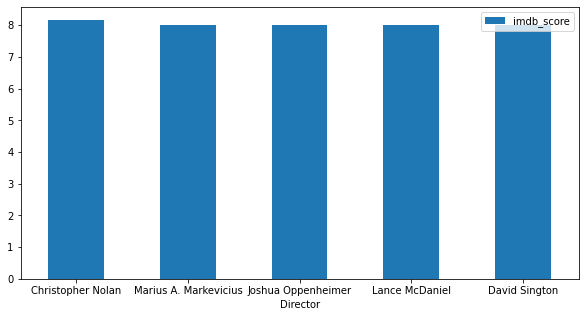

In [ ]:
dir_imdb.sort_values('imdb_score', ascending = False).iloc[0:5].plot(x = 'director_name', y = 'imdb_score', kind = 'bar', rot = 0, figsize = (10, 5));
plt.xlabel("Director");
plt.savefig('dir_imdb.jpeg')

In [ ]:
rec_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,duration_range
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.00,2009.00,936.00,7,1.78,33000,170-179
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.00,2007.00,5000.00,7,2.35,0,160-169
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.00,2015.00,393.00,6,2.35,85000,140-149
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,English,USA,PG-13,250000000.00,2012.00,23000.00,8,2.35,164000,160-169
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,73058679.00,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.00,2012.00,632.00,6,2.35,24000,130-139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Color,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,...,English,USA,PG-13,3250.00,2005.00,44.00,7,NaN,4,80-89
5037,Color,Edward Burns,14.00,95.00,0.00,133.00,Caitlin FitzGerald,296.00,4584.00,Comedy|Drama,...,English,USA,Not Rated,9000.00,2011.00,205.00,6,NaN,413,90-99
5038,Color,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.00,470.00,7,NaN,84,80-89
5040,Color,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,...,English,USA,NaN,1400.00,2013.00,0.00,6,NaN,16,70-79


In [ ]:
dur_mean_gross=rec_movies.groupby(["duration_range"])["gross", 'budget'].mean().reset_index()
dur_mean_gross.sort_values('gross', ascending = False).iloc[0:5]

C:\Users\kdrkm\AppData\Local\Temp\ipykernel_29752\4180398327.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dur_mean_gross=rec_movies.groupby(["duration_range"])["gross", 'budget'].mean().reset_index()


,duration_range,gross,budget
12,170-179,252061593.86,100927200.00
11,160-169,154188521.07,123500000.00
13,>180,153964258.27,168250000.00
10,150-159,134016250.18,112121591.31
9,140-149,118835054.31,101119509.62


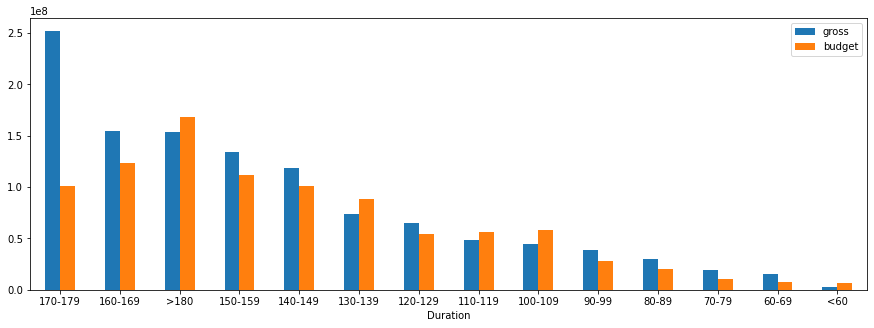

In [ ]:
dur_mean_gross.sort_values('gross', ascending = False).plot(x = 'duration_range', y = ['gross', 'budget'], kind = 'bar', rot = 0, figsize = (15, 5));
plt.xlabel("Duration");
plt.savefig('dur_mean_gross.jpeg')

In [ ]:
dur_movie_fb_likes=rec_movies.groupby(["duration_range"])["movie_facebook_likes"].mean().reset_index()
dur_movie_fb_likes.sort_values('movie_facebook_likes', ascending = False).iloc[0:5]

,duration_range,movie_facebook_likes
11,160-169,67158.31
13,>180,50728.69
12,170-179,35826.00
9,140-149,33405.31
10,150-159,27738.54


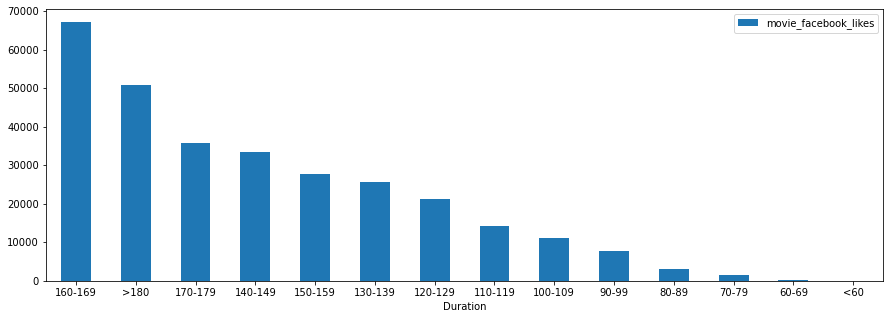

In [ ]:
dur_movie_fb_likes.sort_values('movie_facebook_likes', ascending = False).plot(x = 'duration_range', y = 'movie_facebook_likes', kind = 'bar', rot = 0, figsize = (15, 5));
plt.xlabel("Duration");
plt.savefig('dur_movie_fb_likes.jpeg')

In [ ]:
dur_imdb=rec_movies.groupby(["duration_range"])["imdb_score"].mean().reset_index()
dur_imdb.sort_values('imdb_score', ascending = False)

,duration_range,imdb_score
11,160-169,6.81
13,>180,6.81
12,170-179,6.78
9,140-149,6.68
10,150-159,6.66
8,130-139,6.50
0,<60,6.42
7,120-129,6.41
6,110-119,6.16
1,60-69,6.12


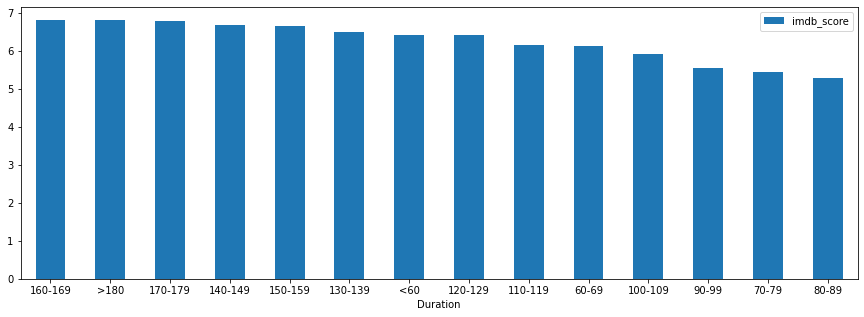

In [ ]:
dur_imdb.sort_values('imdb_score', ascending = False).plot(x = 'duration_range', y = 'imdb_score', kind = 'bar', rot = 0, figsize = (15, 5));
plt.xlabel("Duration");
plt.savefig('dur_imdb.jpeg')

In [ ]:
dur_mean_all=rec_movies.groupby(["duration_range"])["gross", 'budget', 'movie_facebook_likes', 'imdb_score' ].mean().reset_index()
dur_mean_all.sort_values('gross', ascending = False)

C:\Users\kdrkm\AppData\Local\Temp\ipykernel_29752\2881453044.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dur_mean_all=rec_movies.groupby(["duration_range"])["gross", 'budget', 'movie_facebook_likes', 'imdb_score' ].mean().reset_index()


,duration_range,gross,budget,movie_facebook_likes,imdb_score
12,170-179,252061593.86,100927200.00,35826.00,6.78
11,160-169,154188521.07,123500000.00,67158.31,6.81
13,>180,153964258.27,168250000.00,50728.69,6.81
10,150-159,134016250.18,112121591.31,27738.54,6.66
9,140-149,118835054.31,101119509.62,33405.31,6.68
8,130-139,74279793.89,88893444.44,25612.78,6.50
7,120-129,64645731.86,54715630.84,21199.75,6.41
6,110-119,48508108.40,55822138.64,14225.07,6.16
5,100-109,44680211.79,57850256.51,10989.66,5.91
4,90-99,38936581.46,27663605.80,7764.45,5.56


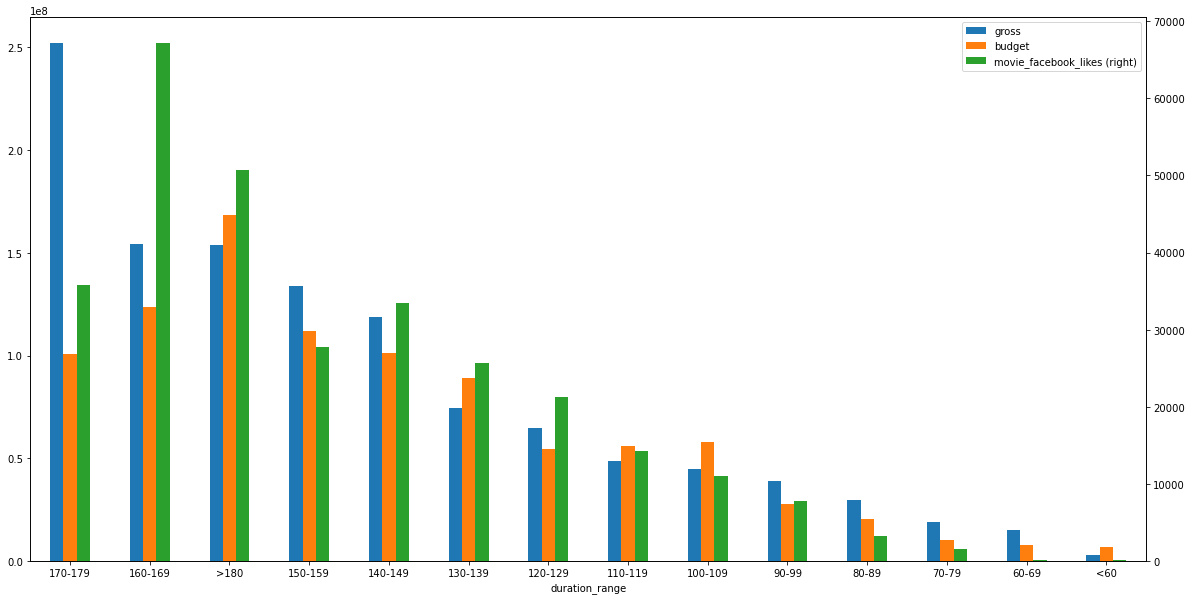

In [ ]:
dur_mean_all.sort_values('gross', ascending = False).plot(x = 'duration_range', y = ['gross', 'budget', 'movie_facebook_likes'], secondary_y = ['movie_facebook_likes'], kind = 'bar', rot = 0, figsize = (20, 10));
plt.xlabel("Duration");
plt.savefig('dur_mean_all.jpeg')

In [ ]:
import numpy as np  # For computations
import pandas as pd  # For indexing our data

np.random.seed(12345)
import matplotlib.pyplot as plt  # for visualizing our data
import seaborn as sns
%matplotlib inline
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# Our temporal data types
from datetime import datetime
from datetime import timedelta

# For grabbing data sets
import requests

<Figure size 432x288 with 0 Axes>

### Actor Analysis

In [ ]:
df.isnull().any()

color                       True
director_name               True
num_critic_for_reviews      True
duration                    True
director_facebook_likes     True
                           ...  
title_year                  True
actor_2_facebook_likes      True
imdb_score                 False
aspect_ratio                True
movie_facebook_likes       False
Length: 28, dtype: bool

In [ ]:
(df.isnull().sum()/df.shape[0])*100

color                     0.3768
director_name             2.0623
num_critic_for_reviews    0.9915
duration                  0.2974
director_facebook_likes   2.0623
                           ...  
title_year                2.1416
actor_2_facebook_likes    0.2578
imdb_score                0.0000
aspect_ratio              6.5239
movie_facebook_likes      0.0000
Length: 28, dtype: float64

In [ ]:
df2005=df[df['title_year']>=2005]
df2005.shape


(2646, 28)

In [ ]:
#Create df for each actor 1,2,3 with relevant features for our analysis. Droping any duplicate rows or nan values
actor_1_df= df2005[['title_year','actor_1_name','actor_1_facebook_likes','gross','imdb_score','movie_facebook_likes',]].copy().drop_duplicates().dropna()
actor_2_df= df2005[['title_year','actor_2_name','actor_2_facebook_likes','gross','imdb_score','movie_facebook_likes','movie_title']].copy().drop_duplicates().dropna()
actor_3_df= df2005[['title_year','actor_3_name','actor_3_facebook_likes','gross','imdb_score','movie_facebook_likes','movie_title']].copy().drop_duplicates().dropna()


In [ ]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [ ]:
#Grouing by actor 1 and aggregating values
grouped_actor_1_df=actor_1_df.groupby(['actor_1_name']).agg({'actor_1_facebook_likes': ['max'],'gross': ['max'],'imdb_score': ['mean'],'movie_facebook_likes': ['mean']})
grouped_actor_1_df.columns = [ 'facebook_likes_max', 'gross_max','imdb_mean','movie_facebook_mean']
grouped_actor_1_df=grouped_actor_1_df.reset_index()


In [ ]:
# Actor 1 Datafram of names
Ranking_actor_1_df=grouped_actor_1_df['actor_1_name'].to_frame()
Sorting_columns={'gross_max':'gross_points','facebook_likes_max':'facebook_points','imdb_mean':'imdb_points','movie_facebook_mean':'movie_facebook_points'}
# Rank_results=['gross_points','facebook_points','imdb_points','movie_facebook_points']

for key,value in Sorting_columns.items() :
    gross_points_df=grouped_actor_1_df.sort_values([key],ascending=False).head(10)
    gross_points_df[value]=gross_points_df[key].rank()
    Ranking_actor_1_df=Ranking_actor_1_df.merge(gross_points_df[['actor_1_name',value]],how='left',left_on='actor_1_name',right_on='actor_1_name')


In [ ]:
#create weightings for each points category
weights={'gross_points':4,'facebook_points':1,'imdb_points':2,'movie_facebook_points':3}

for key,value in weights.items() :
    Ranking_actor_1_df[key]=Ranking_actor_1_df[key].apply(lambda x: x*value)
    

In [ ]:
sum_columns=['gross_points','facebook_points','imdb_points','movie_facebook_points']
Ranking_actor_1_df=Ranking_actor_1_df.fillna(0)
Ranking_actor_1_df['total_points']=Ranking_actor_1_df.sum(axis=1)
Ranking_actor_1_df=Ranking_actor_1_df.sort_values('total_points',ascending=False).head(50)

C:\Users\ewing\AppData\Local\Temp\ipykernel_7552\2648899075.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Ranking_actor_1_df['total_points']=Ranking_actor_1_df.sum(axis=1)


In [ ]:
#Top 20 actor 1 according to data
Ranking_actor_1_df.sort_values('total_points',ascending=False).head(20)

,actor_1_name,gross_points,facebook_points,imdb_points,movie_facebook_points,total_points
129,CCH Pounder,40.0000,0.0000,0.0000,0.0000,40.0000
125,Bryce Dallas Howard,36.0000,0.0000,0.0000,0.0000,36.0000
165,Chris Hemsworth,32.0000,0.0000,0.0000,0.0000,32.0000
762,Phaldut Sharma,0.0000,0.0000,0.0000,30.0000,30.0000
171,Christian Bale,28.0000,0.0000,0.0000,0.0000,28.0000
749,Patrick Fugit,0.0000,0.0000,0.0000,27.0000,27.0000
757,Peter Capaldi,0.0000,0.0000,0.0000,24.0000,24.0000
944,Tom Hardy,24.0000,0.0000,0.0000,0.0000,24.0000
200,Craig Stark,0.0000,4.0000,0.0000,18.0000,22.0000
904,Suraj Sharma,0.0000,0.0000,0.0000,21.0000,21.0000


Actor 2

In [ ]:
grouped_actor_2_df=actor_2_df.groupby(['actor_2_name']).agg({'actor_2_facebook_likes': ['max'],'gross': ['max'],'imdb_score': ['mean'],'movie_facebook_likes': ['mean']})
grouped_actor_2_df.columns = [ 'facebook_likes_max', 'gross_max','imdb_mean','movie_facebook_mean']
grouped_actor_2_df=grouped_actor_2_df.reset_index()

0               50 Cent
1           AJ Michalka
2         Aaron Ashmore
3          Aaron Hughes
4          Aaron Staton
             ...       
1466        Zen McGrath
1467          Zoe Kazan
1468        Zoey Deutch
1469    Zooey Deschanel
1470        Zoë Kravitz
Name: actor_2_name, Length: 1471, dtype: object

In [ ]:
# Actor 2 Datafram of names
Ranking_actor_2_df=grouped_actor_2_df['actor_2_name'].to_frame()
#Dict mapping key value pairs
Sorting_columns={'gross_max':'gross_points','facebook_likes_max':'facebook_points','imdb_mean':'imdb_points','movie_facebook_mean':'movie_facebook_points'}

#For loop assigning point to each actor based on rankings per category

for key,value in Sorting_columns.items() :
    points2_df=grouped_actor_2_df.sort_values([key],ascending=False).head(10)
    points2_df[value]=points2_df[key].rank()
    Ranking_actor_2_df=Ranking_actor_2_df.merge(points2_df[['actor_2_name',value]],how='left',left_on='actor_2_name',right_on='actor_2_name')


In [ ]:
#create weightings for each points category
weights={'gross_points':4,'facebook_points':1,'imdb_points':2,'movie_facebook_points':3}

for key,value in weights.items() :
    Ranking_actor_2_df[key]=Ranking_actor_2_df[key].apply(lambda x: x*value)

In [ ]:
sum_columns=['gross_points','facebook_points','imdb_points','movie_facebook_points']
Ranking_actor_2_df=Ranking_actor_2_df.fillna(0)
Ranking_actor_2_df['total_points']=Ranking_actor_2_df.sum(axis=1)
Ranking_actor_2_df=Ranking_actor_2_df.sort_values('total_points',ascending=False).head(50)

C:\Users\ewing\AppData\Local\Temp\ipykernel_7552\1328858593.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Ranking_actor_2_df['total_points']=Ranking_actor_2_df.sum(axis=1)


In [ ]:
#Top 20 actor 2 according to data
Ranking_actor_2_df.sort_values('total_points',ascending=False).head(20)

,actor_2_name,gross_points,facebook_points,imdb_points,movie_facebook_points,total_points
1382,Tom Hardy,0.0000,9.0000,16.0000,27.0000,52.0000
686,Joel David Moore,40.0000,0.0000,0.0000,0.0000,40.0000
1184,Robert Downey Jr.,32.0000,2.0000,0.0000,6.0000,40.0000
727,Judy Greer,36.0000,0.0000,0.0000,0.0000,36.0000
279,Christian Bale,24.0000,6.5000,0.0000,0.0000,30.5000
840,Lauren Cohan,0.0000,0.0000,0.0000,30.0000,30.0000
560,Heath Ledger,28.0000,0.0000,0.0000,0.0000,28.0000
403,Donald Glover,0.0000,0.0000,0.0000,24.0000,24.0000
197,Brian Johnson,0.0000,0.0000,0.0000,21.0000,21.0000
721,Josh Hutcherson,20.0000,0.0000,0.0000,0.0000,20.0000


Actor 3

In [ ]:
grouped_actor_3_df=actor_3_df.groupby(['actor_3_name']).agg({'actor_3_facebook_likes': ['max'],'gross': ['max'],'imdb_score': ['mean'],'movie_facebook_likes': ['mean']})
grouped_actor_3_df.columns = [ 'facebook_likes_max', 'gross_max','imdb_mean','movie_facebook_mean']
grouped_actor_3_df=grouped_actor_3_df.reset_index()


In [ ]:
# Actor 3 Datafram of names
Ranking_actor_3_df=grouped_actor_3_df['actor_3_name'].to_frame()
Sorting_columns={'gross_max':'gross_points','facebook_likes_max':'facebook_points','imdb_mean':'imdb_points','movie_facebook_mean':'movie_facebook_points'}

#For loop assigning point to each actor based on rankings per category

for key,value in Sorting_columns.items() :
    points3_df=grouped_actor_3_df.sort_values([key],ascending=False).head(10)
    points3_df[value]=points3_df[key].rank()
    Ranking_actor_3_df=Ranking_actor_3_df.merge(points3_df[['actor_3_name',value]],how='left',left_on='actor_3_name',right_on='actor_3_name')


In [ ]:
#create weightings for each points category
weights={'gross_points':4,'facebook_points':1,'imdb_points':2,'movie_facebook_points':3}

for key,value in weights.items() :
    Ranking_actor_3_df[key]=Ranking_actor_3_df[key].apply(lambda x: x*value)

In [ ]:
#Sum for total point per actor
sum_columns=['gross_points','facebook_points','imdb_points','movie_facebook_points']
Ranking_actor_3_df=Ranking_actor_3_df.fillna(0)
Ranking_actor_3_df['total_points']=Ranking_actor_3_df.sum(axis=1)
Ranking_actor_3_df=Ranking_actor_3_df.sort_values('total_points',ascending=False).head(50)

C:\Users\ewing\AppData\Local\Temp\ipykernel_7552\1064934057.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Ranking_actor_3_df['total_points']=Ranking_actor_3_df.sum(axis=1)


In [ ]:
#Top 20 actor 3 according to data
Ranking_actor_3_df.sort_values('total_points',ascending=False).head(20)

,actor_3_name,gross_points,facebook_points,imdb_points,movie_facebook_points,total_points
801,Joseph Gordon-Levitt,24.0000,10.0000,19.0000,24.0000,77.0000
1193,Omar Sy,36.0000,0.0000,0.0000,18.0000,54.0000
1136,Morgan Freeman,28.0000,0.0000,19.0000,0.0000,47.0000
1632,Wes Studi,40.0000,0.0000,0.0000,0.0000,40.0000
1419,Scarlett Johansson,32.0000,7.5000,0.0000,0.0000,39.5000
26,Alan D. Purwin,0.0000,0.0000,0.0000,30.0000,30.0000
986,Mackenzie Foy,0.0000,0.0000,0.0000,27.0000,27.0000
63,Allen Leech,0.0000,0.0000,0.0000,21.0000,21.0000
1408,Sandra Ellis Lafferty,20.0000,0.0000,0.0000,0.0000,20.0000
1267,Puti Sri Candra Dewi,0.0000,0.0000,16.0000,0.0000,16.0000


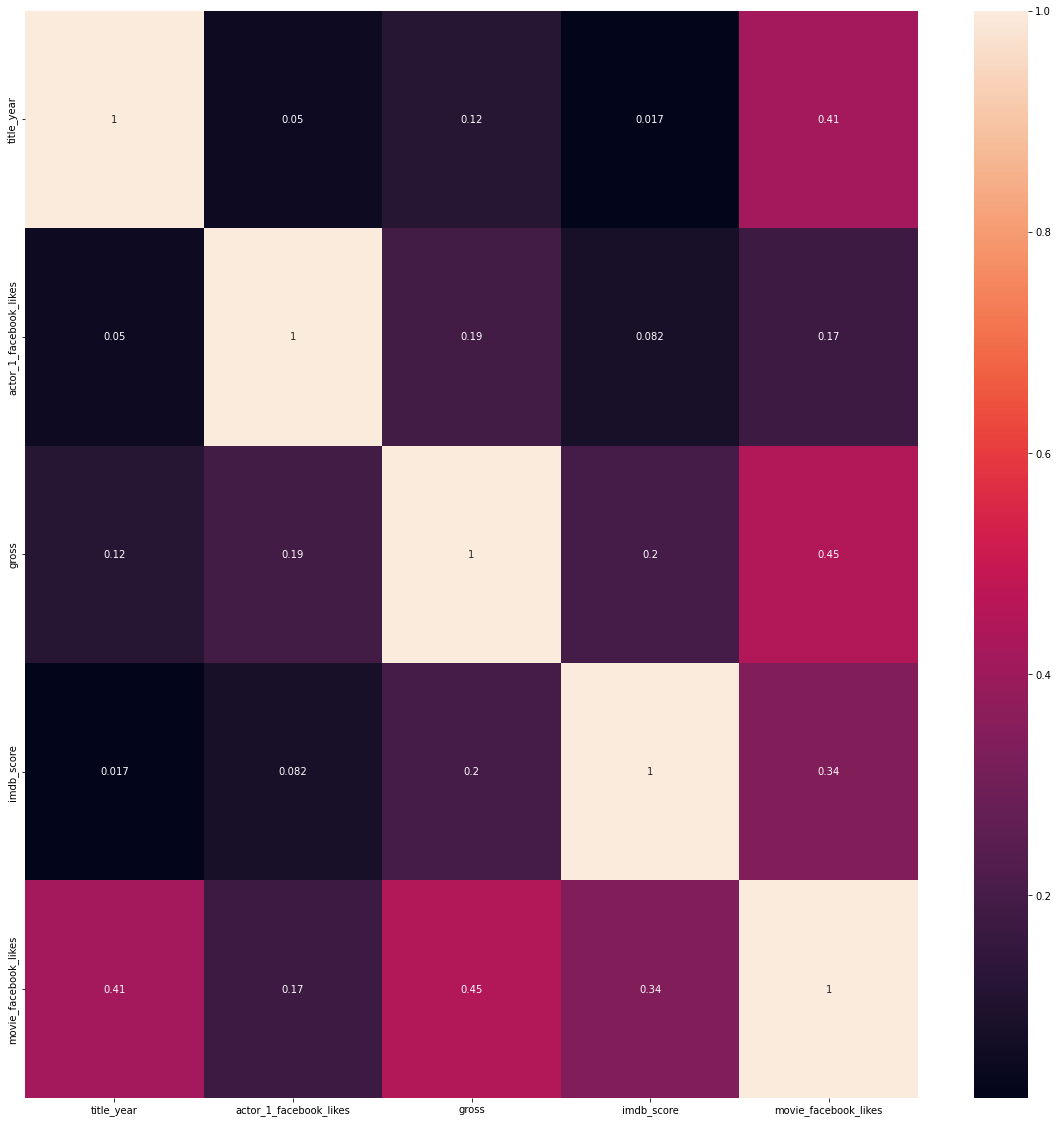

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(actor_1_df.corr(), annot = True)
plt.savefig("feature_corr.jpg")

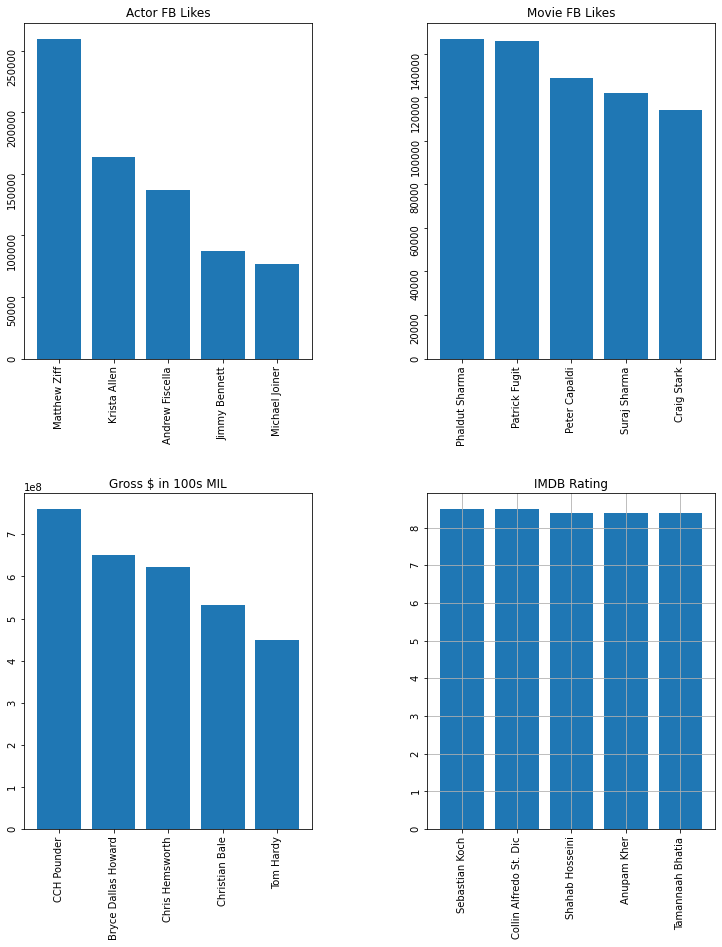

In [ ]:
# bar charts for Actor 1
#Facebook Actor likes
data=grouped_actor_1_df.sort_values(['facebook_likes_max'],ascending=False).head(5)
x_af=data.actor_1_name
y_af=data.facebook_likes_max

#Facebook movie likes
data2=grouped_actor_1_df.sort_values(['movie_facebook_mean'],ascending=False).head(5)
x_fm=data2.actor_1_name
y_fm=data2.movie_facebook_mean

#gross
data3=grouped_actor_1_df.sort_values(['gross_max'],ascending=False).head(5)
x_g=data3.actor_1_name
y_g=data3.gross_max

#imdb rating
data4=grouped_actor_1_df.sort_values(['imdb_mean'],ascending=False).head(5)
x_i=data4.actor_1_name
y_i=data4.imdb_mean

fig, axs = plt.subplots(2, 2,figsize=(12,14))
axs[0,0].bar(x_af,y_af)
axs[0,1].bar(x_fm,y_fm)
axs[1,0].bar(x_g,y_g)
axs[1,1].bar(x_i,y_i)
axs[0,0].tick_params(labelrotation=90)
axs[0,1].tick_params(labelrotation=90)
axs[1,0].tick_params(labelrotation=90)
axs[1,1].tick_params(labelrotation=90)
axs[0, 0].set_title('Actor FB Likes')
axs[0, 1].set_title('Movie FB Likes')
axs[1, 0].set_title('Gross $ in 100s MIL')
axs[1, 1].set_title('IMDB Rating')
plt.grid(True)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# plt.savefig("Actor_1_Rank_by_feature.jpg")

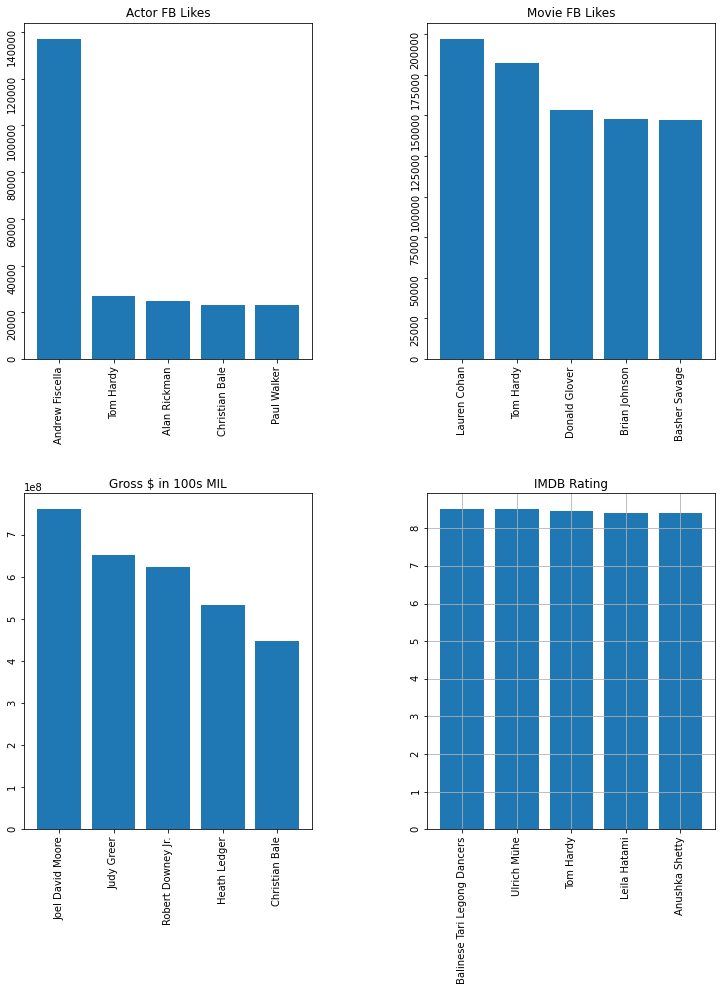

In [ ]:
# bar charts for Actor 2
#Facebook Actor likes
data=grouped_actor_2_df.sort_values(['facebook_likes_max'],ascending=False).head(5)
x_af=data.actor_2_name
y_af=data.facebook_likes_max

#Facebook movie likes
data2=grouped_actor_2_df.sort_values(['movie_facebook_mean'],ascending=False).head(5)
x_fm=data2.actor_2_name
y_fm=data2.movie_facebook_mean

#gross
data3=grouped_actor_2_df.sort_values(['gross_max'],ascending=False).head(5)
x_g=data3.actor_2_name
y_g=data3.gross_max

#imdb rating
data4=grouped_actor_2_df.sort_values(['imdb_mean'],ascending=False).head(5)
x_i=data4.actor_2_name
y_i=data4.imdb_mean

fig, axs = plt.subplots(2, 2,figsize=(12,14))
axs[0,0].bar(x_af,y_af)
axs[0,1].bar(x_fm,y_fm)
axs[1,0].bar(x_g,y_g)
axs[1,1].bar(x_i,y_i)
axs[0,0].tick_params(labelrotation=90)
axs[0,1].tick_params(labelrotation=90)
axs[1,0].tick_params(labelrotation=90)
axs[1,1].tick_params(labelrotation=90)
axs[0, 0].set_title('Actor FB Likes')
axs[0, 1].set_title('Movie FB Likes')
axs[1, 0].set_title('Gross $ in 100s MIL')
axs[1, 1].set_title('IMDB Rating')
plt.grid(True)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig("Actor_2_Rank_by_feature.jpg")

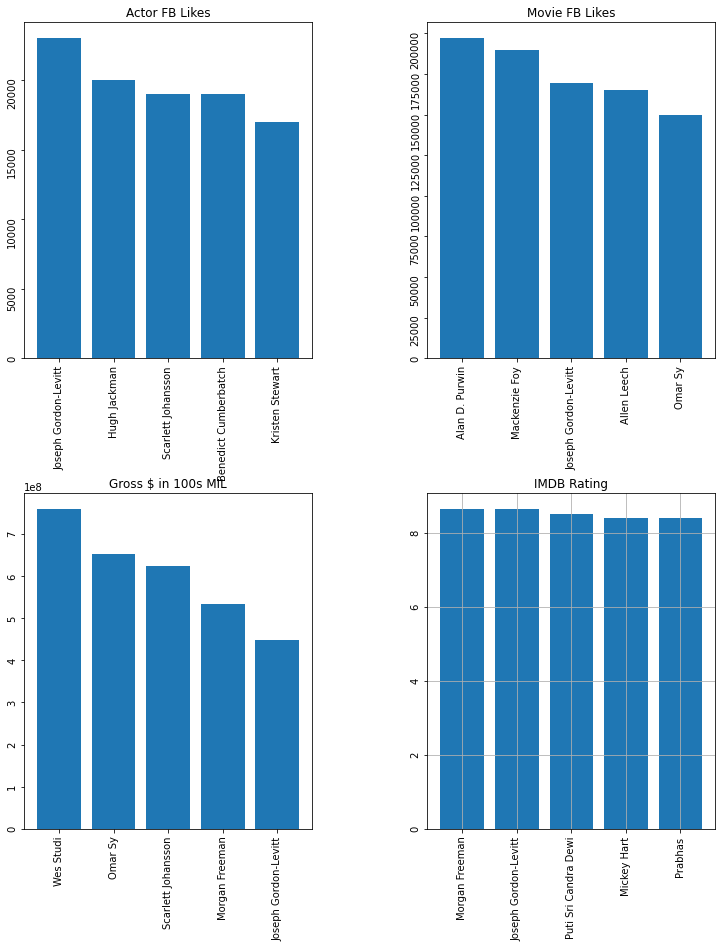

In [ ]:
# bar charts for Actor 3
#Facebook Actor likes
data=grouped_actor_3_df.sort_values(['facebook_likes_max'],ascending=False).head(5)
x_af=data.actor_3_name
y_af=data.facebook_likes_max

#Facebook movie likes
data2=grouped_actor_3_df.sort_values(['movie_facebook_mean'],ascending=False).head(5)
x_fm=data2.actor_3_name
y_fm=data2.movie_facebook_mean

#gross
data3=grouped_actor_3_df.sort_values(['gross_max'],ascending=False).head(5)
x_g=data3.actor_3_name
y_g=data3.gross_max

#imdb rating
data4=grouped_actor_3_df.sort_values(['imdb_mean'],ascending=False).head(5)
x_i=data4.actor_3_name
y_i=data4.imdb_mean

fig, axs = plt.subplots(2, 2,figsize=(12,14))
axs[0,0].bar(x_af,y_af)
axs[0,1].bar(x_fm,y_fm)
axs[1,0].bar(x_g,y_g)
axs[1,1].bar(x_i,y_i)
axs[0,0].tick_params(labelrotation=90)
axs[0,1].tick_params(labelrotation=90)
axs[1,0].tick_params(labelrotation=90)
axs[1,1].tick_params(labelrotation=90)
axs[0, 0].set_title('Actor FB Likes')
axs[0, 1].set_title('Movie FB Likes')
axs[1, 0].set_title('Gross $ in 100s MIL')
axs[1, 1].set_title('IMDB Rating')
plt.grid(True)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig("Actor_3_Rank_by_feature.jpg")

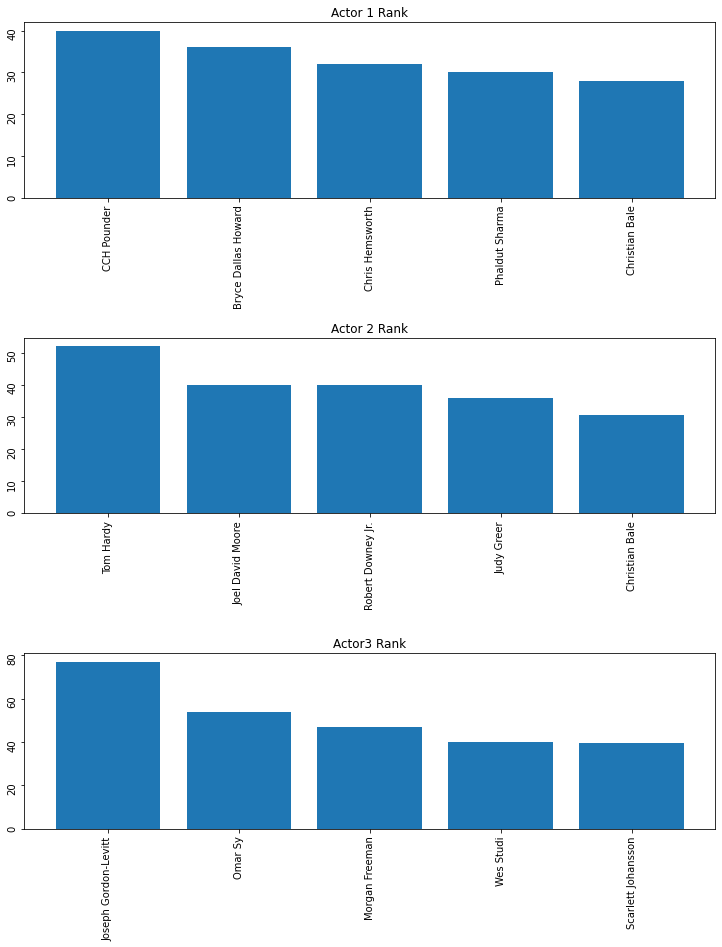

In [ ]:
# bar charts for Actor 1 total points
#Actor 1
data=Ranking_actor_1_df.sort_values('total_points',ascending=False).head(5)
x_af=data.actor_1_name
y_af=data.total_points

#Actor2
data2=Ranking_actor_2_df.sort_values('total_points',ascending=False).head(5)
x_fm=data2.actor_2_name
y_fm=data2.total_points

#Actor3
data3=Ranking_actor_3_df.sort_values('total_points',ascending=False).head(5)
x_g=data3.actor_3_name
y_g=data3.total_points


fig, (axs1, axs2,axs3) = plt.subplots(3,figsize=(12,14))
axs1.bar(x_af,y_af)
axs2.bar(x_fm,y_fm)
axs3.bar(x_g,y_g)
# axs[1,1].bar(x_i,y_i)
axs1.tick_params(labelrotation=90)
axs2.tick_params(labelrotation=90)
axs3.tick_params(labelrotation=90)

axs1.set_title('Actor 1 Rank')
axs2.set_title('Actor 2 Rank')
axs3.set_title('Actor3 Rank')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.savefig("Actor_total_points.jpg")

In [ ]:
# Plot Keywords NAME = "Cam Walters"

In [ ]:
# read in data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mmd = pd.read_csv('movie_metadata.csv')
new_mmd = pd.DataFrame(mmd[mmd['title_year'] >= 2005])

In [ ]:
new_mmd['plot_keywords'] = new_mmd['plot_keywords'].fillna('')
new_mmd['sep_key'] = new_mmd['plot_keywords'].str.split('|')
print (new_mmd['sep_key'])

0            [avatar, future, marine, native, paraplegic]
1       [goddess, marriage ceremony, marriage proposal...
2               [bomb, espionage, sequel, spy, terrorist]
3       [deception, imprisonment, lawlessness, police ...
5       [alien, american civil war, male nipple, mars,...
                              ...                        
5036    [jewell, mongol, nostradamus, stepnicka, vallone]
5037                [written and directed by cast member]
5038         [fraud, postal worker, prison, theft, trial]
5040                                                   []
5041                                                   []
Name: sep_key, Length: 2646, dtype: object


In [ ]:
# pull out keywords individually
sk_array_SK = new_mmd['sep_key'].values.reshape(-1)
sk_array_TY = new_mmd['title_year'].values.reshape(-1)
sk_array_G = new_mmd['gross'].values.reshape(-1)
sk_array_B = new_mmd['budget'].values.reshape(-1)
sk_array = np.vstack((sk_array_SK,sk_array_TY,sk_array_G,sk_array_B)).T
sk_array_retooled = []
for i in range (len(sk_array)):
    for j in range (len(sk_array[i,0])):
        sk_array_retooled.append([sk_array[i,0][j],sk_array[i,1],sk_array[i,2],sk_array[i,3]])
sk_df = pd.DataFrame(sk_array_retooled)
sk_df.columns = ['Keyword','Year','Gross','Budget']
# filter blanks out of the data frame
sk_df_clean = pd.DataFrame(sk_df[sk_df['Keyword'] != ''])
# add in a 'returns' value based on ratio of money earned to budget
sk_df_clean['Return'] = (sk_df_clean['Gross'] / sk_df_clean['Budget']) - 1
# generate a count of keyword by year
sk_df_count = pd.DataFrame(sk_df_clean.groupby(['Keyword','Year'])['Keyword'].count())
sk_df_count.columns = ['KeywordCount']
sk_pivot = pd.pivot_table (data=sk_df_count, index=['Keyword'], columns=['Year'], values=['KeywordCount'], aggfunc=np.sum)
sk_pivot['Total'] = sk_pivot.sum(axis=1)
#print (sk_pivot)
#generate an average return for each keyword
sk_df_return = pd.DataFrame(sk_df_clean.groupby('Keyword')['Return'].mean())
sk_df_return.columns = ['AverageReturn']
# join the count and return datasets
sk_df_assess = pd.concat([sk_pivot, sk_df_return], axis=1, join='outer')
sk_df_assess.columns = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','Total','Return']
print (sk_df_assess.sort_values(by=['Return'], ascending = False).head(20))

                       2005  2006  2007  2008  2009  2010  2011  2012  2013  \
Keyword                                                                       
dark force              NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
paranormal phenomenon   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
entity                  NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
evil force              NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
found footage           NaN   NaN   1.0   2.0   NaN   1.0   1.0   4.0   NaN   
breaking and entering   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
gallows                 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
hanging                 NaN   NaN   NaN   1.0   NaN   NaN   NaN   1.0   1.0   
stage                   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   
internet pornography    NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
vacuum cleaner          NaN   NaN   1.0   NaN   NaN 

In [ ]:
print (len(sk_df_assess))
# weed out some of the less desirable keywords
sk_df_assess_better = pd.DataFrame(sk_df_assess[sk_df_assess['Return'] > 0])
sk_df_assess_better_still = pd.DataFrame(sk_df_assess_better[sk_df_assess_better['Total'] > 10])

5273


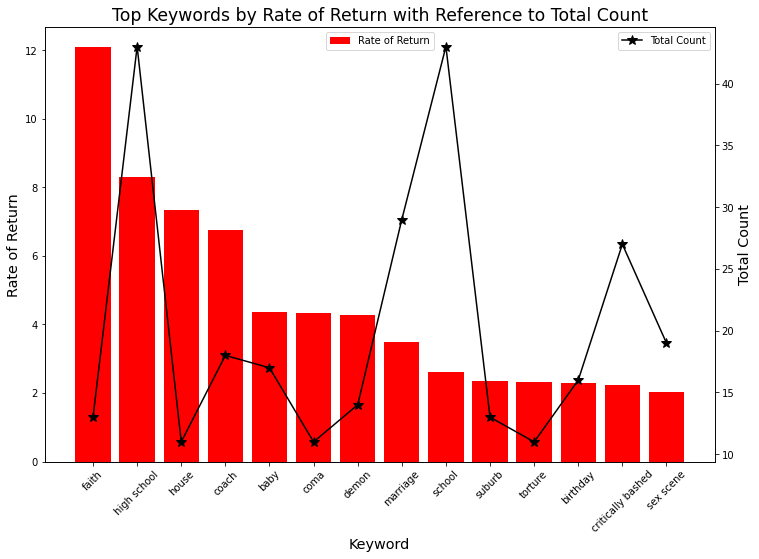

In [ ]:
# assess best keywords by return... but exclude found footage for now
#print (sk_df_assess_better_still.sort_values(by=['Return'], ascending = False).head(20))
sk_df_assess_return = pd.DataFrame(sk_df_assess_better_still[(sk_df_assess_better_still['Return'] > 2) & (sk_df_assess_better_still['Return'] < 100)])

# plot the keywords
plt.rcParams["figure.figsize"] = [12, 8]
#plt.rcParams["figure.autolayout"] = True
fig1, ax1 = plt.subplots()

ax1.bar (sk_df_assess_return.sort_values(by=['Return'], ascending = False).index, sk_df_assess_return.sort_values(by=['Return'], ascending=False)['Return'], color='red', label='Rate of Return')
ax2 = ax1.twinx()
ax2.plot (sk_df_assess_return.sort_values(by=['Return'], ascending = False).index, sk_df_assess_return.sort_values(by=['Return'], ascending = False)['Total'], marker='*', color='black', markersize=10, label='Total Count')

ax1.set_title ('Top Keywords by Rate of Return with Reference to Total Count', fontsize='xx-large')
ax1.set_xlabel ('Keyword', fontsize='x-large')
ax1.tick_params (axis='x', labelrotation=45)
ax1.set_ylabel ('Rate of Return', fontsize='x-large')
ax2.set_ylabel ('Total Count', fontsize='x-large')
ax1.legend(loc='upper center')
ax2.legend()

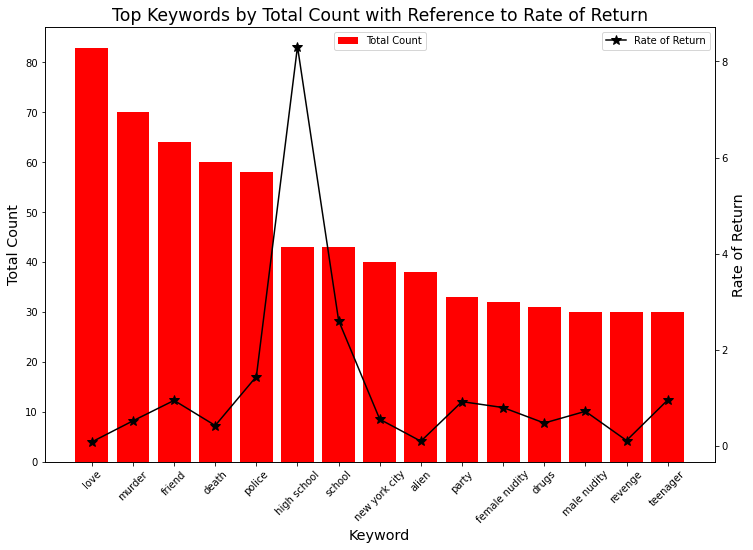

In [ ]:
# assess best keywords by total count
#print (sk_df_assess_better_still.sort_values(by=['Total'], ascending = False).head(20))
sk_df_assess_count = pd.DataFrame(sk_df_assess_better_still[sk_df_assess_better_still['Total'] >= 30])

# plot the keywords
plt.rcParams["figure.figsize"] = [12, 8]
#plt.rcParams["figure.autolayout"] = True
fig2, ax3 = plt.subplots()

ax3.bar (sk_df_assess_count.sort_values(by=['Total'], ascending = False).index, sk_df_assess_count.sort_values(by=['Total'], ascending=False)['Total'], color='red', label='Total Count')
ax4 = ax3.twinx()
ax4.plot (sk_df_assess_count.sort_values(by=['Total'], ascending = False).index, sk_df_assess_count.sort_values(by=['Total'], ascending = False)['Return'], marker='*', color='black', markersize=10, label='Rate of Return')

ax3.set_title ('Top Keywords by Total Count with Reference to Rate of Return', fontsize='xx-large')
ax3.set_xlabel ('Keyword', fontsize='x-large')
ax3.tick_params (axis='x', labelrotation=45)
ax3.set_ylabel ('Total Count', fontsize='x-large')
ax4.set_ylabel ('Rate of Return', fontsize='x-large')
ax3.legend(loc='upper center')
ax4.legend()

### Genres Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
# drop null value
def process_missing_data(df,method='drop'):
    if df.isnull().values.any():
        if method =='drop':
            df =df.dropna()
        elif method =='fill':
            df =df.fillna(0.)
    return df.reset_index(drop=True)
df=process_missing_data(df)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [6]:
df=df[df['title_year']>=2005]
df.head()
df.info()
# drop duplicated rows
df=df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 3748
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      1876 non-null   object 
 1   director_name              1876 non-null   object 
 2   num_critic_for_reviews     1876 non-null   float64
 3   duration                   1876 non-null   float64
 4   director_facebook_likes    1876 non-null   float64
 5   actor_3_facebook_likes     1876 non-null   float64
 6   actor_2_name               1876 non-null   object 
 7   actor_1_facebook_likes     1876 non-null   float64
 8   gross                      1876 non-null   float64
 9   genres                     1876 non-null   object 
 10  actor_1_name               1876 non-null   object 
 11  movie_title                1876 non-null   object 
 12  num_voted_users            1876 non-null   int64  
 13  cast_total_facebook_likes  1876 non-null   int64

In [7]:
#top 100 movies by gross,facebooklikes, and imdb score
def movie_rank(df,metrics,csvfile_path):
    df1=df[['movie_title','gross','movie_facebook_likes','imdb_score','title_year','genres']].set_index(keys='movie_title')
    sorted_data = df1.sort_values(by=metrics,ascending = False)[[metrics,'genres','title_year']]
    sorted_data.to_csv(csvfile_path, index=True)
    return sorted_data.head(100)
    
movie_rank(df,'gross','C:\\Users\\James.J\\Downloads\\Fundationsof Data Science_Waterloo\\Group4 assignment\\movie_ranked_by_gross.csv')
movie_rank(df,'movie_facebook_likes','C:\\Users\\James.J\\Downloads\\Fundationsof Data Science_Waterloo\\Group4 assignment\\movie_ranked_by_facebook_likes.csv')
movie_rank(df,'imdb_score','C:\\Users\\James.J\\Downloads\\Fundationsof Data Science_Waterloo\\Group4 assignment\\movie_ranked_by_imdb_score.csv')

,imdb_score,genres,title_year
movie_title,,,
The Dark Knight,9.0,Action|Crime|Drama|Thriller,2008.0
Inception,8.8,Action|Adventure|Sci-Fi|Thriller,2010.0
Interstellar,8.6,Adventure|Drama|Sci-Fi,2014.0
Django Unchained,8.5,Drama|Western,2012.0
The Lives of Others,8.5,Drama|Thriller,2006.0
...,...,...,...
Straight Outta Compton,7.9,Biography|Crime|Drama|History|Music,2015.0
Big Hero 6,7.9,Action|Adventure|Animation|Comedy|Drama|Family...,2014.0
"4 Months, 3 Weeks and 2 Days",7.9,Drama,2007.0


In [8]:
 #top 100 movies by gross,facebooklikes, and imdb score
df_gross = pd.read_csv('movie_ranked_by_gross.csv').head(100)
df_facebooklikes = pd.read_csv('movie_ranked_by_facebook_likes.csv').head(100)
df_imdbscore=pd.read_csv('movie_ranked_by_imdb_score.csv').head(100)

In [9]:
# rebuild genres data
def get_genres_data(df):
    #split the column
    genre_df =df['genres'].str.split('|', expand=True)
    #set the columns name for newly splited columns
    no_cols =genre_df.shape[1]
    genre_cols=['genre_{}'.format(i) for i in range(no_cols)]
    genre_df.columns=genre_cols
    #combine data frame
    use_cols =['movie_title'] + genre_cols
    concat_df = pd.concat([df_gross,genre_df],axis=1)[use_cols].set_index('movie_title')
    stacked_df = concat_df.stack().to_frame()
    stacked_df.columns =['genres']
    return stacked_df

In [10]:
# Top 5 genres among top 100 movies by box office/gross
df_genres1 = get_genres_data(df_gross)
genres_count_by_grossRank= df_genres1.groupby(['genres']).size().sort_values(ascending=False).to_frame()
genres_count_by_grossRank.to_csv('C:\\Users\\James.J\\Downloads\\Fundationsof Data Science_Waterloo\\Group4 assignment\\genres_countbygross.csv')

In [11]:
# Top 5 genres among top 100 movies by box office/gross
genres_top5_gross = genres_count_by_grossRank.head(5)
genres_top5_gross.columns = ['count']
genres_top5_gross

,count
genres,
Adventure,79
Action,53
Fantasy,43
Sci-Fi,36
Family,35


Text(0, 0.5, 'Count')

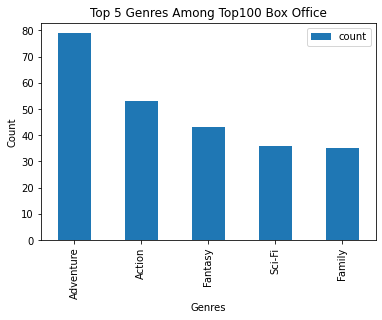

In [12]:
# bar chart
genres_top5_gross.plot.bar()
plt.title("Top 5 Genres Among Top100 Box Office")
plt.xlabel("Genres")
plt.ylabel("Count")

In [13]:
# Top 5 genres among top 100 movies by facebook likes
df_genres2 = get_genres_data(df_facebooklikes)
genres_count_by_facebooklikes= df_genres2.groupby(['genres']).size().sort_values(ascending=False).to_frame()
genres_count_by_facebooklikes.to_csv('C:\\Users\\James.J\\Downloads\\Fundationsof Data Science_Waterloo\\Group4 assignment\\genres_countbyfacebooklikes.csv')
genres_count_by_facebooklikes.head()

,0
genres,
Drama,53
Adventure,43
Action,42
Sci-Fi,35
Thriller,31


Text(0, 0.5, 'Count')

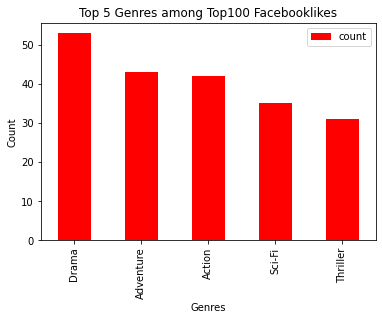

In [14]:
# bar chart
genres_top5_facebooklikes = genres_count_by_facebooklikes.head(5)
genres_top5_facebooklikes.columns = ['count']
genres_top5_facebooklikes.plot(kind='bar', title ='Genres by count', color = 'red')

plt.title("Top 5 Genres among Top100 Facebooklikes")
plt.xlabel("Genres")
plt.ylabel("Count")

In [15]:
# Top 5 genres among top 100 movies by imdb score
df_genres3 = get_genres_data(df_imdbscore)
genres_count_by_imdbscore= df_genres3.groupby(['genres']).size().sort_values(ascending=False).to_frame()
genres_count_by_imdbscore.to_csv('C:\\Users\\James.J\\Downloads\\Fundationsof Data Science_Waterloo\\Group4 assignment\\genres_countbyimdbscore.csv')
genres_count_by_imdbscore.head(10)

,0
genres,
Drama,69
Thriller,31
Adventure,31
Action,25
Sci-Fi,20
Biography,18
Crime,16
Comedy,15
Mystery,11


Text(0, 0.5, 'Count')

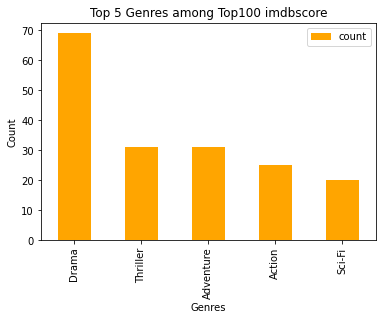

In [16]:
# bar chart
genres_top5_imdbscore = genres_count_by_imdbscore.head(5)
genres_top5_imdbscore.columns = ['count']
genres_top5_imdbscore.plot(kind='bar', title ='Genres by count',color = 'orange')

plt.title("Top 5 Genres among Top100 imdbscore")
plt.xlabel("Genres")
plt.ylabel("Count")

In [17]:
# top 5 genres for all movies since 2005 regardless metrics(box offics, facebooklikes, imdb score) ranking
df_genres = get_genres_data(df[['movie_title','genres']])
genres_count= df_genres.groupby(['genres']).size().sort_values(ascending=False)
genres_count.to_csv('C:\\Users\\James.J\\Downloads\\Fundationsof Data Science_Waterloo\\Group4 assignment\\genres_count.csv')
genres_count.head()

genres
Drama        935
Comedy       692
Thriller     545
Action       476
Adventure    399
dtype: int64

In [18]:
# Top 5 movies containing top 5 genres regardless of box office
df_Top5genres= df[df['genres'].str.contains('Drama|Comedy|Thriller|Action|Adventure')]
df2=df_Top5genres[['movie_title','gross']]
df2.head()

,movie_title,gross
0,Avatar,760505847.0
1,Pirates of the Caribbean: At World's End,309404152.0
2,Spectre,200074175.0
3,The Dark Knight Rises,448130642.0
4,John Carter,73058679.0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


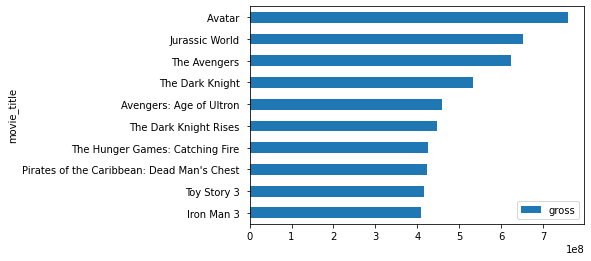

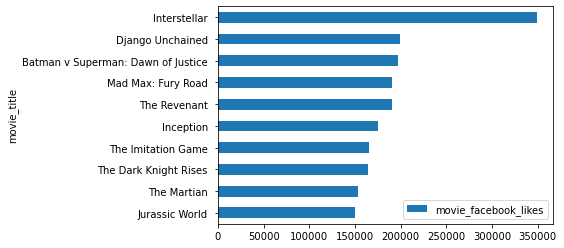

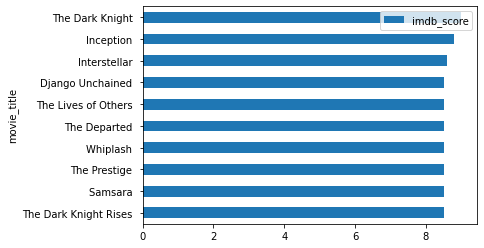

In [19]:
#top 10 movies based on top metrics
def movie_rank_plot(df,metrics):
    df_metrics =df[['movie_title','gross','movie_facebook_likes','imdb_score','title_year']]
    sorted_metrics_data = df_metrics.sort_values(by=metrics,ascending = False).head(10)
    plot = sorted_metrics_data.plot.barh(x='movie_title',y=metrics)
    plot.invert_yaxis()
    print(plot)
movie_rank_plot(df,'gross')
movie_rank_plot(df,'movie_facebook_likes')
movie_rank_plot(df,'imdb_score')

In [27]:
# Avg. box office for movies containing (top5 genres) VS. Avg. box office for movies do not containing (adventure, drama,action)
def comparison_genres(df,metrics):
    df_topgenres= df[df['genres'].str.contains('Drama|Action|Adventure|Sci-Fi|Thriller')]
    df_avg= round(df_topgenres[metrics].mean())
    df_notopgenres = df[~df['genres'].str.contains('Drama|Action|Adventure|Sci-Fi|Thriller', na=False)]
    df_avg_notopgenres = round(df_notopgenres[metrics].mean())
    print(df_avg)
    print(df_avg_notopgenres)
    return round((df_avg/df_avg_notopgenres -1)*100)
    
comparison_genres(df,'gross')


58397508
49096567


19

In [28]:
# avg. facebooklikes for movies containing (adventure, Drama, and action) VS. Avg. facebooklikes for movies do not containing (adventure, drama,action)
comparison_genres(df,'movie_facebook_likes')

17609
9058


94

In [29]:
# avg. imdb score for movies containing (adventure, Drama, and action) VS. Avg. imdb score for movies do not containing (adventure, drama,action)
comparison_genres(df,'imdb_score')

7
6


17

In [24]:
#gross, facebooklikes, imdb_score scatter plot (top 5 movies) or regression/correlation? 

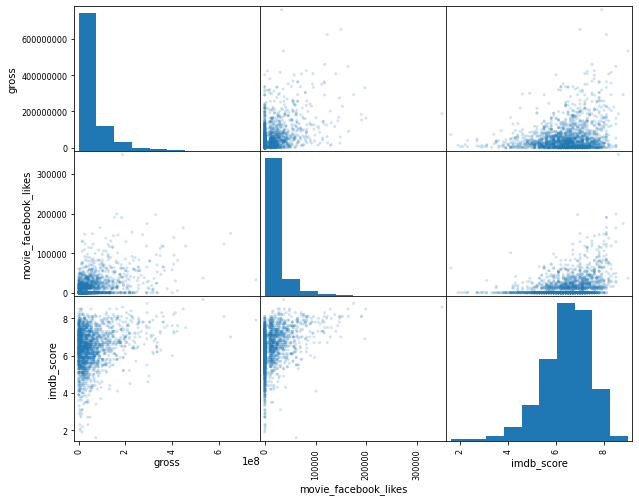

In [25]:
df_metrics_1 = df[['movie_title','gross','movie_facebook_likes','imdb_score']].set_index('movie_title')
pd.plotting.scatter_matrix(df_metrics_1,alpha = 0.2, figsize =(10,8))
plt.show()

In [26]:
#In genreal, the facebook likes and imdb score are correlated

In [31]:
# Combination of Director+ Actors
def analyse_gross(df,groupby_columns,metrics,output_path):
    grouped_data =df.groupby(groupby_columns,as_index = False)[metrics].sum()
    sorted_grouped_data = grouped_data.sort_values(by=metrics,ascending = False)
    sorted_grouped_data.to_csv(output_path,index=False)
    print(sorted_grouped_data.head())
    
director_actors = analyse_gross(df,['director_name','actor_1_name'],'gross',
              '/Users/JamesJin/Downloads/Fundationsof Data Science_Waterloo/Group4 assignment/gross_by_director_actors.csv'
            )


          director_name       actor_1_name         gross
843         Joss Whedon    Chris Hemsworth  1.082271e+09
490    Francis Lawrence  Jennifer Lawrence  1.043416e+09
1590         Tim Burton        Johnny Depp  1.007876e+09
566      Gore Verbinski        Johnny Depp  9.449339e+08
260   Christopher Nolan     Christian Bale  7.917426e+08


In [ ]:
#Countries Content rating --Jay

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
all_countries = pd.unique(df['country'].fillna('--'))

In [ ]:
dict_holder = {}
for i in all_countries:
    dict_holder[i] = len(df[(df['country'] == i)])
marklist = sorted(dict_holder.items(), key=lambda x:x[1])

In [ ]:
country = []
movies_made = []
for i in marklist:
    country.append(np.array(i)[0])
    movies_made.append(np.array(i)[1])

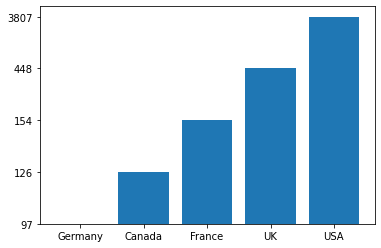

[('Germany', 97), ('Canada', 126), ('France', 154), ('UK', 448), ('USA', 3807)]

In [ ]:
plt.bar(country[-5:], movies_made[-5:])
plt.show()
marklist[-5:]

In [ ]:
gross_holder = {}
content_rating_holder ={}
for i in all_countries:
    x = df[(df['country'] == i)].fillna(0).sort_values(by=['gross'], ascending=False)
    if (len(x) != 0):
        gross_holder[i] = x.iloc[0]['gross']
        content_rating_holder[i] = x.iloc[0]['content_rating']
    else:
        gross_holder[i] = 0
        content_rating_holder[i] = '--'

In [ ]:
marklist2 = sorted(gross_holder.items(), key=lambda x:x[1])

In [ ]:
country2 = []
gross_made = []
for i in marklist2:
    country2.append(np.array(i)[0])
    gross_made.append(np.array(i)[1])

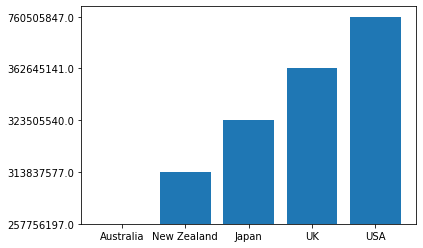

[('Australia', 257756197.0),
 ('New Zealand', 313837577.0),
 ('Japan', 323505540.0),
 ('UK', 362645141.0),
 ('USA', 760505847.0)]

In [ ]:
plt.bar(country2[-5:], gross_made[-5:])
plt.show()
marklist2[-5:]

In [ ]:
for i in country2[-10:][::-1]:
    print(i, content_rating_holder[i])

USA PG-13
UK PG
Japan PG
New Zealand PG-13
Australia PG
Canada PG-13
China PG-13
France PG-13
Germany PG
Taiwan PG-13


In [ ]:
content_rating = pd.unique(df['content_rating'].fillna('--'))
for i in content_rating:
    print(i, len(df[(df['content_rating'] == i)]))

PG-13 1461
-- 0
PG 701
G 112
R 2118
TV-14 30
TV-PG 13
TV-MA 20
TV-G 10
Not Rated 116
Unrated 62
Approved 55
TV-Y 1
NC-17 7
X 13
TV-Y7 1
GP 6
Passed 9
M 5
